In [1]:
from re import X
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(Xtrain,ytrain),(Xtest,ytest) = keras.datasets.cifar10.load_data()
print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

# Data Scaling
Xtrain = Xtrain/Xtrain.max()
Xtest = Xtest/Xtest.max()

170498071/170498071 [==============================] - 11s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


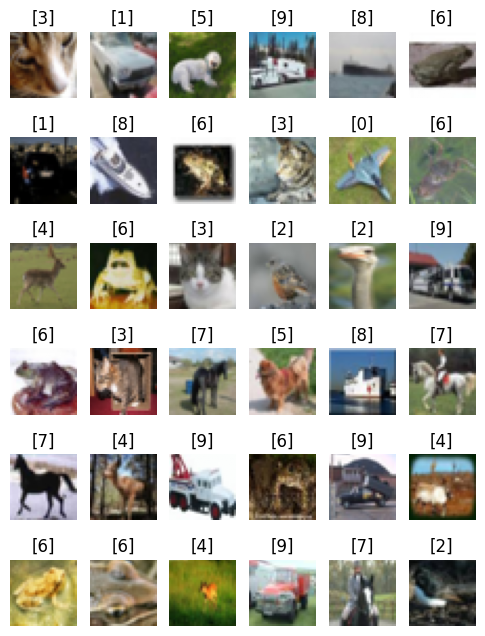

In [9]:
plt.figure(1,(6,8))
for i in range(1,37,1):
  temp= np.random.randint(0,50000)
  im = Xtrain[temp,:,:]
  label = ytrain[temp]
  plt.subplot(6,6,i)
  plt.imshow(im)
  plt.title(label)
  plt.axis('off')
plt.show()

In [10]:
nn_model = keras.Sequential()

nn_model.add(keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2],Xtrain.shape[3])))

nn_model.add(keras.layers.Dense(128,activation='relu'))
nn_model.add(keras.layers.Dense(256,activation='relu'))
nn_model.add(keras.layers.Dense(256,activation='relu'))

nn_model.add(keras.layers.Dense(len(np.unique(ytrain))))


nn_model.compile(optimizer='SGD',loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
print(nn_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               393344    
                                                                 
 dense_9 (Dense)             (None, 256)               33024     
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 dense_11 (Dense)            (None, 10)                2570      
                                                                 
Total params: 494730 (1.89 MB)
Trainable params: 494730 (1.89 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [12]:
history = nn_model.fit(Xtrain,ytrain,epochs=100)

Epoch 1/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2403 - accuracy: 0.5599
Epoch 2/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2201 - accuracy: 0.5658
Epoch 3/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2035 - accuracy: 0.5719
Epoch 4/100
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1863 - accuracy: 0.5778
Epoch 5/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1706 - accuracy: 0.5852
Epoch 6/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1547 - accuracy: 0.5909
Epoch 7/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1383 - accuracy: 0.5955
Epoch 8/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1262 - accuracy: 0.6008
Epoch 9/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1115 - accuracy: 0.6042
Epoch 10/100
1563/1563 [==============================] - 8s 5ms/step - l

Text(0, 0.5, 'Accuracy')

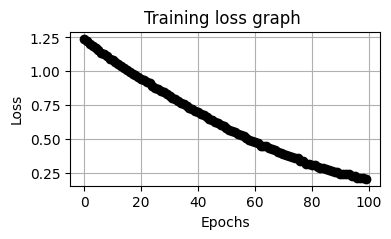

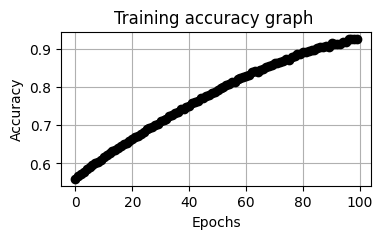

In [13]:
# visualize the training loss and acc
plt.figure(1,(4,2))

plt.plot(history.epoch,history.history['loss'],'--ko')
plt.grid('on')
plt.title('Training loss graph ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.figure(2,(4,2))
plt.plot(history.epoch,history.history['accuracy'],'--ko')
plt.grid('on')
plt.title('Training accuracy graph ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [14]:
# evaluate the test data
[loss, acc] = nn_model.evaluate(Xtest,ytest)
print('Loss:', loss)
print("Testing Accuracy:",acc)

313/313 [==============================] - 1s 3ms/step - loss: 3.0912 - accuracy: 0.5100
Loss: 3.0912065505981445
Testing Accuracy: 0.5099999904632568
